# 4 - Train a YOLOv8 object detection model   🖼️ +📝 --> 💻🧠

### Switch on the GPU (if google allows :))
For model training we can massively speed up training time when using GPUs. Google Colab offers some free access to GPUs. They also offer some paying options if one wants to use it for larger models.

To switch the GPU on go to Edit > Notebook settings > select "GPU"

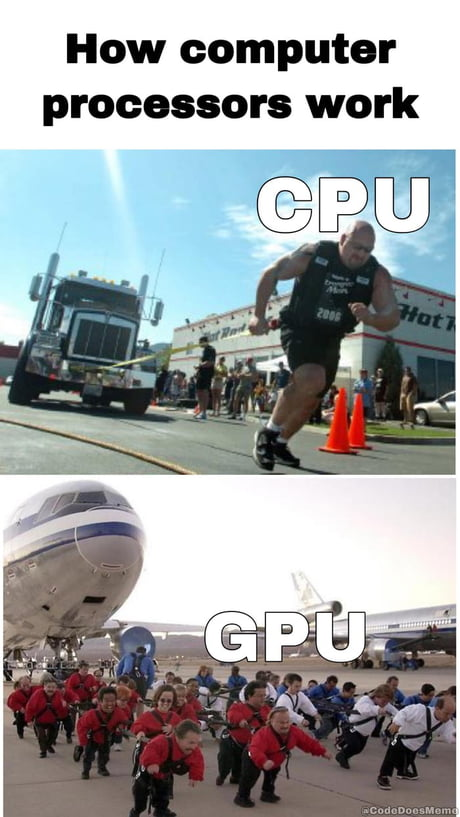

### Setup YOLOv8 and import other libraries
Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [1]:
%pip -q install ultralytics
import ultralytics
ultralytics.checks()
import yaml

Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 4.1. Modeling with my annotations

In [ ]:
annotator_ID=20 # my folder ID

my_drive_path="/content/drive/MyDrive/HOME_EXAM/data"
path_to_tiles= my_drive_path+"/annotated_data/train/"+str(annotator_ID)

### 4.1.1. Create configuration file (.yaml) to pass for model training

In [ ]:
config_data = {
    'path': path_to_tiles,
    'train': path_to_tiles+'/train/images',
    'val': path_to_tiles+'/val/images',
    'test':my_drive_path+"/annotated_data/test/images", # this is by default
    'names': {
        0: 'tree'
    }
}

with open(path_to_tiles+'/train_config.yaml', 'w') as file:
    yaml.dump(config_data, file)

In [ ]:
path_to_tiles+'/train_config.yaml'

'/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/20/train_config.yaml'

### 4.1.2 Train

Model training can be done either through the command line interface (CLI) or through python commands (see examples in [YOLOv8 docs](https://docs.ultralytics.com/modes/train/)). For this course we will use the CLI option as it is a bit more versatile in it's usage.

When training the model there are arguments that are interesting to change to better adjust to the data. Basically, by modifiying **model size** and **image size** is what mostly affect the performance of the models.

Imagine that we want to use th model in a phone or drone it would be best to use a YOLO nano. I want to try YOLO nano (recommended for compact devices such as phones, drones...), YOLO extra-large (good if you have big computational capabilities such as a cloud server with GPU) and YOLO medium, for the sake of getting into the middle point.

Some suggestionsform chatGPT:

YOLO Nano:
> Image Size: 320x320 or 416x416.

> YOLO Nano is designed to be lightweight and suitable for resource-constrained environments. These image sizes should provide a good balance between computational efficiency and capturing seedling details.

YOLO Medium:
> Image Size: 416x416 or 608x608

> YOLO Medium is a mid-sized variant with a moderate number of parameters. These image sizes are commonly used with YOLOv2 (the predecessor of YOLOv3) and can capture sufficient detail for seedling detection.

YOLO Large:
> Image Size: 608x608 or larger

> YOLO Extra-Large refers to models that are larger and more computationally intensive. With a larger image size, such as 608x608 or beyond, you can capture more details and potentially improve the accuracy of seedling detection. However, keep in mind that it will also increase the computational requirements.

The base size of YOLO is 32, which means that in a image size of 416x416, the input image is divided into a grid of 13x13 cells (416/32 = 13). If the image size is 608x608, the grid is 19x19 cells and if the image size is 800x800, the grid is 25*25 cells. The higher the number of divisions that the input image goes through, the higher the computational power needed.

### 4.1.3. Train and track in COMET
Experiment tracking is important when developing a deep learning model as it can be an iterative process.

Luckily there are many options available but for YOLOv8, one of the free and nice tools is [Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov8&utm_medium=partner&utm_content=github) ☄️

In [ ]:
%pip install comet_ml --quiet
import comet_ml # in future scripts this should be pasted before importing the ultralytics library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 534.7/534.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.1/510.1 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 6.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have requests 2.31.0 which is incompatible.


- initialize Comet project: this will require getting the API key from User settings in your Comet account:

In [ ]:
comet_ml.init(project_name='seedlingDetection_YOLOv8_HomeExam_MyAnnotations')

- Now train the model and navigate to your Comet account and go to projects and you can visualize the results for each run under the same project

In [ ]:
#YOLO nano with 416x416 which means the input image is divided into a grid of 13x13 cells (32*13 =  416). 32 is the base
!yolo train model=yolov8n.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=416 project=$path_to_tiles name="seedlingsDetection_YOLOn_img416_annotations_20"
!yolo train model=yolov8n.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=608 project=$path_to_tiles name="seedlingsDetection_YOLOn_img608_annotations_20"
!yolo train model=yolov8n.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=800 project=$path_to_tiles name="seedlingsDetection_YOLOn_img800_annotations_20"

Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/20/train_config.yaml, epochs=300, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/20, name=seedlingsDetection_YOLOn_img416_annotations_20, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=Fal

In [ ]:
#YOLO medium with 608x608
!yolo train model=yolov8m.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=416 project=$path_to_tiles name="seedlingsDetection_YOLOm_img416_annotations_20"
!yolo train model=yolov8m.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=608 project=$path_to_tiles name="seedlingsDetection_YOLOm_img608_annotations_20"
!yolo train model=yolov8m.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=800 project=$path_to_tiles name="seedlingsDetection_YOLOm_img800_annotations_20"

Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/20/train_config.yaml, epochs=300, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/20, name=seedlingsDetection_YOLOm_img416_annotations_20, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=Fal

In [ ]:
#YOLO extra-large with 800x800
!yolo train model=yolov8l.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=416 project=$path_to_tiles name="seedlingsDetection_YOLOl_img416_annotations_20"
!yolo train model=yolov8l.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=608 project=$path_to_tiles name="seedlingsDetection_YOLOl_img608_annotations_20"
!yolo train model=yolov8l.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=800 project=$path_to_tiles name="seedlingsDetection_YOLOl_img800_annotations_20"

Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/20/train_config.yaml, epochs=300, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/20, name=seedlingsDetection_YOLOl_img416_annotations_20, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=Fal

After the first training, we can check the models in COMET. Specially important are the **F1-Confidence curves** which indicate the confidence value that you can use to re-train the model.

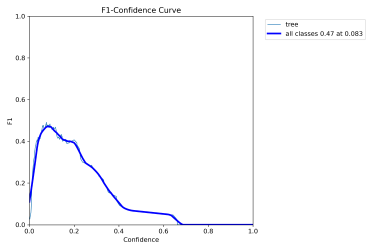



In this execirse I wont be using it since there are a lot of moels to run, but in real life you would want to do some further tuning to the models

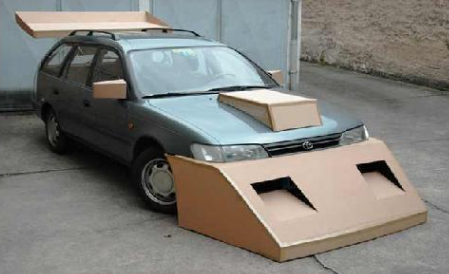

# 4.2. Modeling with all annotations from the course

In [3]:
# set paths
annotator_ID="full_data" #

my_drive_path="/content/drive/MyDrive/HOME_EXAM/data"
path_to_tiles= my_drive_path+"/annotated_data/train/"+str(annotator_ID)+"/all_data"

In [ ]:
# Create configuration file (.yaml) to pass for model training
config_data = {
    'path': path_to_tiles,
    'train': path_to_tiles+'/train/images',
    'val': path_to_tiles+'/val/images',
    'test':my_drive_path+"/annotated_data/test/images", # this is by default
    'names': {
        0: 'tree'
    }
}

with open(path_to_tiles+'/train_config.yaml', 'w') as file:
    yaml.dump(config_data, file)

Make project in COMET

In [ ]:
comet_ml.init(project_name='seedlingDetection_YOLOv8_HomeExam_fullAnnotations')

Train the models

In [ ]:
#YOLO nano with 416x416 which means the input image is divided into a grid of 13x13 cells (32*13 =  416). 32 is the base
!yolo train model=yolov8n.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=416 project=$path_to_tiles name="seedlings_YOLOn_img416_annotations_full_data"
!yolo train model=yolov8n.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=608 project=$path_to_tiles name="seedlings_YOLOn_img608_annotations_full_data"
!yolo train model=yolov8n.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=800 project=$path_to_tiles name="seedlings_YOLOn_img800_annotations_full_data"

Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/full_data/all_data/train_config.yaml, epochs=300, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/full_data/all_data, name=seedlings_YOLOn_img416_annotations_full_data, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, 

In [ ]:
#YOLO medium with 608x608
!yolo train model=yolov8m.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=416 project=$path_to_tiles name="seedlings_YOLOm_img416_annotations_full_data"
!yolo train model=yolov8m.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=608 project=$path_to_tiles name="seedlings_YOLOm_img608_annotations_full_data"
!yolo train model=yolov8m.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=800 project=$path_to_tiles name="seedlings_YOLOm_img800_annotations_full_data"

Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/full_data/all_data/train_config.yaml, epochs=300, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/full_data/all_data, name=seedlings_YOLOm_img416_annotations_full_data, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, 

In [ ]:
#YOLO large with 800x800
!yolo train model=yolov8l.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=416 project=$path_to_tiles name="seedlings_YOLOl_img416_annotations_full_data"
!yolo train model=yolov8l.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=608 project=$path_to_tiles name="seedlings_YOLOl_img608_annotations_full_data"
!yolo train model=yolov8l.pt data=$path_to_tiles"/train_config.yaml" epochs=300 imgsz=800 project=$path_to_tiles name="seedlings_YOLOl_img800_annotations_full_data"

100% 83.7M/83.7M [00:00<00:00, 201MB/s]
Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/full_data/all_data/train_config.yaml, epochs=300, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/HOME_EXAM/data/annotated_data/train/full_data/all_data, name=seedlings_YOLOl_img416_annotations_full_data, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_lab